In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
cunlp_df = pd.read_excel("dataset/cunlp.xlsx")
cunlp_df = cunlp_df.drop(columns=['id', 'dataset', 'question_id', 'question', 'correct'])
cunlp_df.head()

,real_answer,answer,score
0,"If the question is IR-Based, I will do the fol...",Using semantic analysis methods. We can use ve...,25
1,"If the question is IR-Based, I will do the fol...","we should use vector space model. firstly, bin...",25
2,"If the question is IR-Based, I will do the fol...","Assume we have a question like "" Why the sky i...",50
3,"If the question is IR-Based, I will do the fol...",We can use Vector Space Model that is represen...,25
4,"If the question is IR-Based, I will do the fol...",In this corpus we will use sentence segmenting...,50


In [3]:
cunlp_df['prompt'] = (
    "Reference Answer: " + cunlp_df['real_answer'] + "\n"
    "Student Answer: " + cunlp_df['answer'] + "\n"
    "Grading Rubric: 0-100 (where 0 is the lowest score and 100 is the highest).\n"
    "Scores given by experts: " + str(cunlp_df['score'])
)
cunlp_df['prompt_length'] = cunlp_df['prompt'].apply(len)
cunlp_df.head()

,real_answer,answer,score,prompt,prompt_length
0,"If the question is IR-Based, I will do the fol...",Using semantic analysis methods. We can use ve...,25,"Reference Answer: If the question is IR-Based,...",1241
1,"If the question is IR-Based, I will do the fol...","we should use vector space model. firstly, bin...",25,"Reference Answer: If the question is IR-Based,...",1337
2,"If the question is IR-Based, I will do the fol...","Assume we have a question like "" Why the sky i...",50,"Reference Answer: If the question is IR-Based,...",1478
3,"If the question is IR-Based, I will do the fol...",We can use Vector Space Model that is represen...,25,"Reference Answer: If the question is IR-Based,...",1600
4,"If the question is IR-Based, I will do the fol...",In this corpus we will use sentence segmenting...,50,"Reference Answer: If the question is IR-Based,...",1517


In [4]:
cunlp_df['prompt_length'].describe()

count     171.000000
mean     1237.929825
std       253.293124
min       754.000000
25%      1034.500000
50%      1209.000000
75%      1400.000000
max      2023.000000
Name: prompt_length, dtype: float64

In [5]:
cunlp_df.shape

(171, 5)

## Score distribution plot

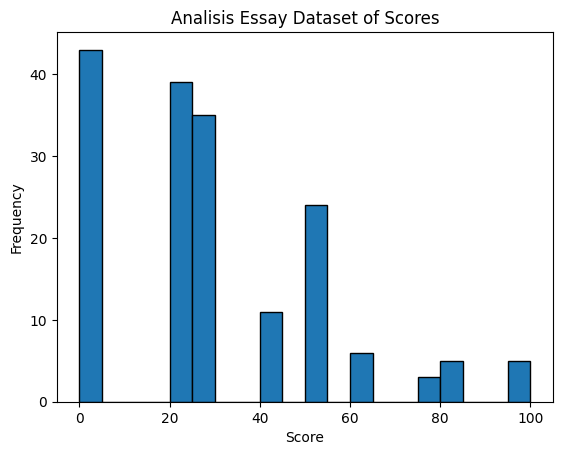

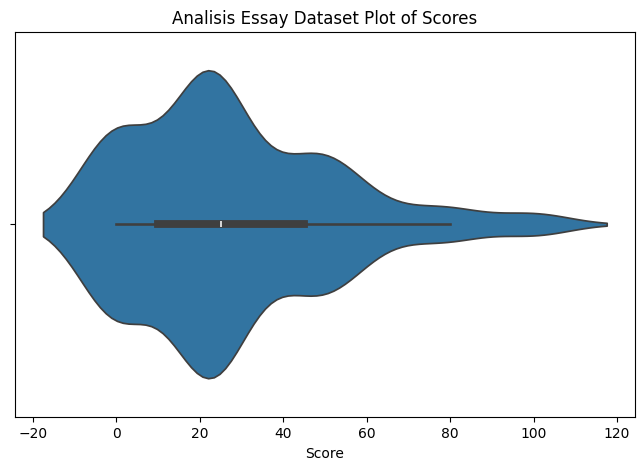

In [15]:
plt.hist(cunlp_df['score'], bins=20, edgecolor='black')
plt.title('Analisis Essay Dataset of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(8, 5))
sns.violinplot(x=cunlp_df['score'])
plt.title('Analisis Essay Dataset Plot of Scores')
plt.xlabel('Score')
plt.show()


## Input Length Plot

In [6]:
cunlp_df['r_length'] = cunlp_df['real_answer'].apply(len)
cunlp_df['a_length'] = cunlp_df['answer'].apply(len)

In [7]:
print("\ndeskripsi reference answer")
print(cunlp_df['r_length'].describe())
print("\ndeskripsi student answer")
print(cunlp_df['a_length'].describe())


deskripsi reference answer
count    171.000000
mean     614.473684
std      203.015280
min      439.000000
25%      439.000000
50%      439.000000
75%      888.000000
max      889.000000
Name: r_length, dtype: float64

deskripsi student answer
count     171.000000
mean      327.456140
std       185.556404
min         1.000000
25%       202.000000
50%       306.000000
75%       418.500000
max      1288.000000
Name: a_length, dtype: float64


### Reference answer plot

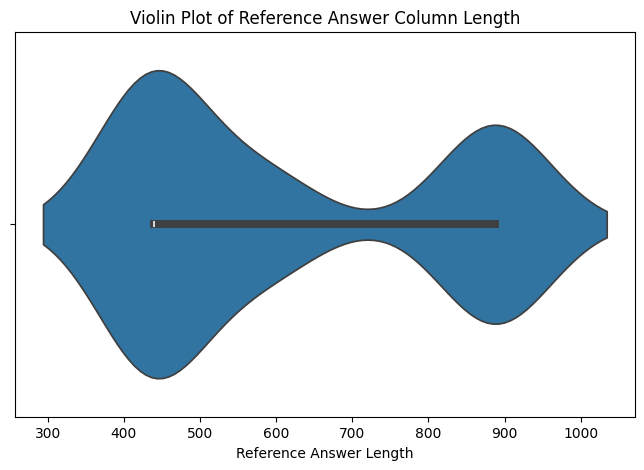

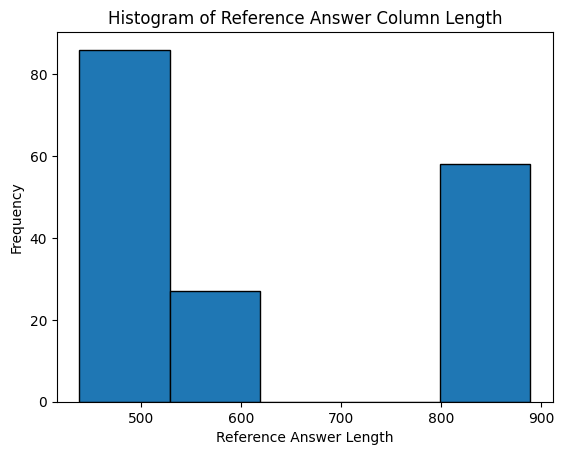

In [8]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=cunlp_df['r_length'])
plt.title('Violin Plot of Reference Answer Column Length')
plt.xlabel('Reference Answer Length')
plt.show()
plt.hist(cunlp_df['r_length'], bins=5, edgecolor='black')
plt.title('Histogram of Reference Answer Column Length')
plt.xlabel('Reference Answer Length')
plt.ylabel('Frequency')
plt.show()

### Student Answer plot

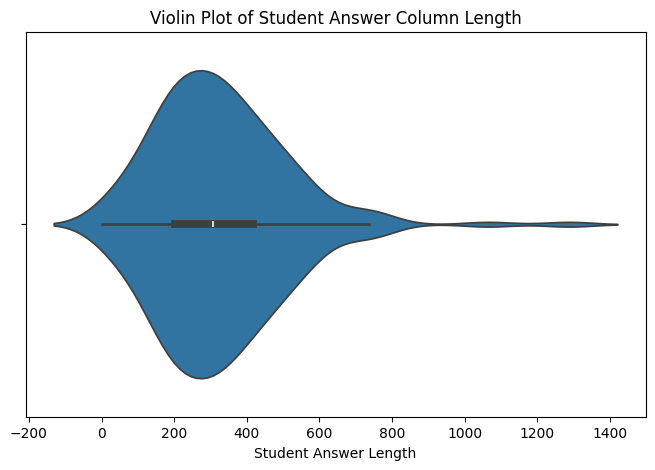

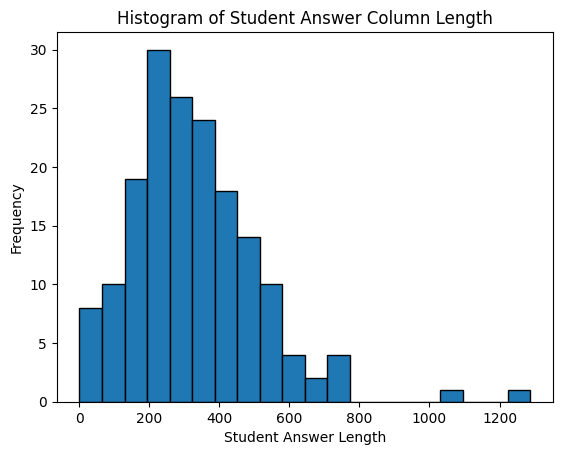

In [9]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=cunlp_df['a_length'])
plt.title('Violin Plot of Student Answer Column Length')
plt.xlabel('Student Answer Length')
plt.show()
plt.hist(cunlp_df['a_length'], bins=20, edgecolor='black')
plt.title('Histogram of Student Answer Column Length')
plt.xlabel('Student Answer Length')
plt.ylabel('Frequency')
plt.show()